In [1]:
# 統計的機械学習の数理第６章　鈴木譲著　を参考にさせていただいた

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=2, suppress = True)

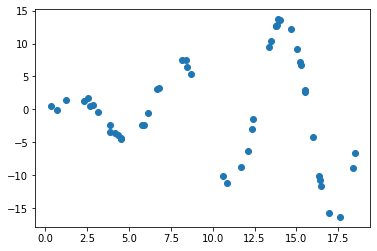

In [3]:
N = 50

x = np.random.rand(N) * 6 * np.pi
y = x * np.sin(x) + 0.3 * np.random.randn(N)

plt.scatter(x, y)

In [4]:
#Epanechnikov カーネル
def K(x, y, lam):
    t = np.abs(x-y)/lam
    return np.maximum(0.75*(1-t**2), 0)

#各局所点でのベータ推定
def local(x, y, z):
    n = len(y)
    x = x.reshape(-1,1)
    X = np.insert(x, 0, 1, axis=1)
    yy = []
    for u in z:
        w = np.zeros(N)
        for i in range(N):
            w[i]=K(x[i], u, lam=1)
        W = np.diag(w)
        beta_hat = np.linalg.inv(X.T@W@X)@X.T@W@y
        yy.append(beta_hat[0] + beta_hat[1] * u)
    return yy

In [5]:
x_min = np.min(x)
x_max = np.max(x)

U = np.linspace(x_min, x_max, 40)
V = local(x, y, U)

In [6]:
U[:10]

array([0.32, 0.79, 1.25, 1.72, 2.18, 2.65, 3.12, 3.58, 4.05, 4.51])

In [7]:
V[:10]

[0.35753630309798057,
 0.6056017174692919,
 1.2926943188316362,
 1.3428878144972332,
 1.3488656500406395,
 0.9157062707756909,
 -0.3994781121971691,
 -1.7978518352082258,
 -3.2097583884733503,
 -4.375661385169892]

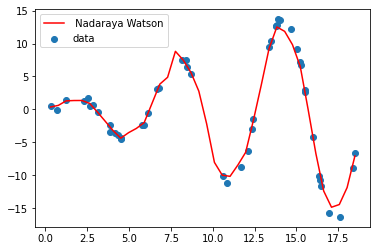

In [8]:
plt.scatter(x, y, label = 'data')
plt.plot(U, V, c="red", label = ' Nadaraya Watson')
plt.legend()